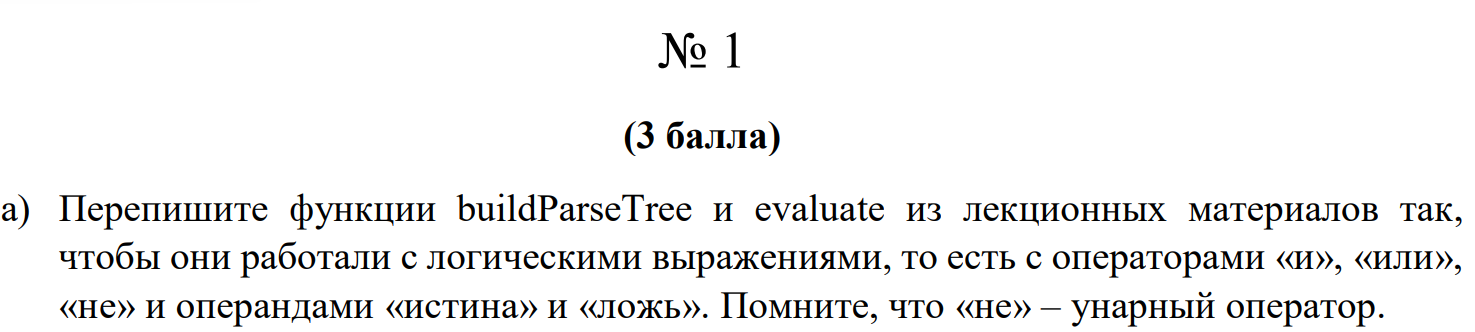

In [10]:
class BinaryTree:
    def __init__(self, rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self, newMode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newMode)
        else:
            t = BinaryTree(newMode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self, newMode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newMode)
        else:
            t = BinaryTree(newMode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self, obj):
        self.key = obj

    def getRootVal(self):
        return self.key


def buildParseTree(fpexp):
    fplist = fpexp.replace('(', ' ( ').replace(')', ' ) ').split()
    pStack = []
    eTree = BinaryTree('')
    pStack.append(eTree)
    currentTree = eTree

    for i in fplist:
        if i == '(':
            currentTree.insertLeft('')
            pStack.append(currentTree)
            currentTree = currentTree.getLeftChild()

        elif i == "not":
            currentTree.setRootVal('not')
            currentTree.insertLeft('')
            pStack.append(currentTree)
            currentTree = currentTree.getLeftChild()

        elif i in ['and', 'or']:
            currentTree.setRootVal(i)
            currentTree.insertRight('')
            pStack.append(currentTree)
            currentTree = currentTree.getRightChild()

        elif i == ')':
            currentTree = pStack.pop()

        elif i in ['true', 'false']:
            currentTree.setRootVal(i)
            parent = pStack.pop()
            currentTree = parent

        else:
            raise ValueError('Unknown Token ' + i)

    return eTree


def evaluate(parseTree):
    opers = {
        'and': lambda x, y: x and y,
        'or': lambda x, y: x or y,
        'not': lambda x: not x
    }

    val = parseTree.getRootVal()

    # Пропуск пустых узлов-оберток
    if val == '' or val is None:
        if parseTree.getLeftChild():
            return evaluate(parseTree.getLeftChild())
        return None

    leftC = parseTree.getLeftChild()
    rightC = parseTree.getRightChild()

    if leftC and rightC:
        fn = opers[val]
        return fn(evaluate(leftC), evaluate(rightC))
    elif leftC and not rightC:
        # Случай унарного оператора
        fn = opers[val]
        return fn(evaluate(leftC))
    else:
        # Базовый случай лист
        if val == 'true': return True
        if val == 'false': return False
        return val



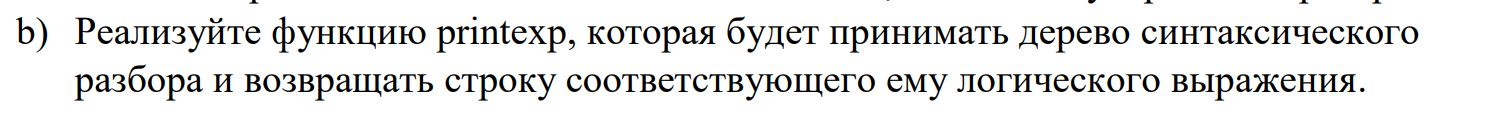

In [11]:
def printexp(tree):
    val = tree.getRootVal()
    
    # Если узел пустой спускаемся глубже
    if val == '' or val is None:
        if tree.getLeftChild():
            return printexp(tree.getLeftChild())
        return ""

    # Если есть оба потомка
    if tree.getLeftChild() and tree.getRightChild():
        return "(" + printexp(tree.getLeftChild()) + " " + str(val) + " " + printexp(tree.getRightChild()) + ")"
    
    # Если только левый потомок
    elif tree.getLeftChild() and not tree.getRightChild():
        return "(" + str(val) + " " + printexp(tree.getLeftChild()) + ")"
    
    # Если лист
    else:
        return str(val)

# Пример использования
expr = "( ( true and false ) or ( not false ) )"
pt = buildParseTree(expr)
print("Логическое выражение:", printexp(pt))
print("Результат вычисления:", evaluate(pt))


Логическое выражение: ((true and false) or (not false))
Результат вычисления: True


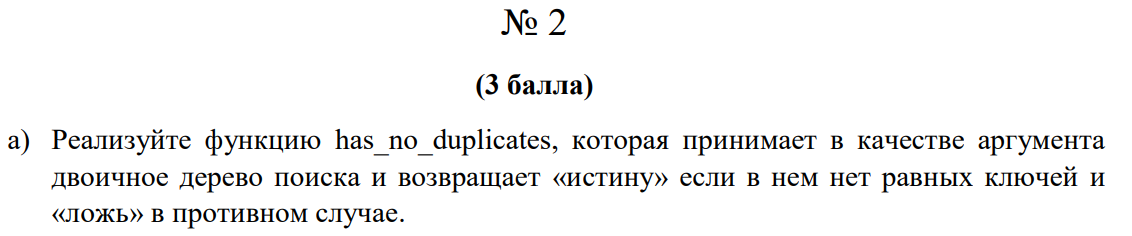

In [12]:
def has_no_duplicates(tree):
    """Возвращает True, если в дереве нет дублирующихся ключей и False, если есть"""
    seen_keys = set()
    
    def _check_node(node):
        if not node:
            return True
        
        # Если ключ уже видели - дубликат
        if node.key in seen_keys:
            return False
        
        seen_keys.add(node.key)
        
        # Рекурсивно проверяем левое и правое поддерево
        return _check_node(node.leftChild) and _check_node(node.rightChild)

    return _check_node(tree.root)


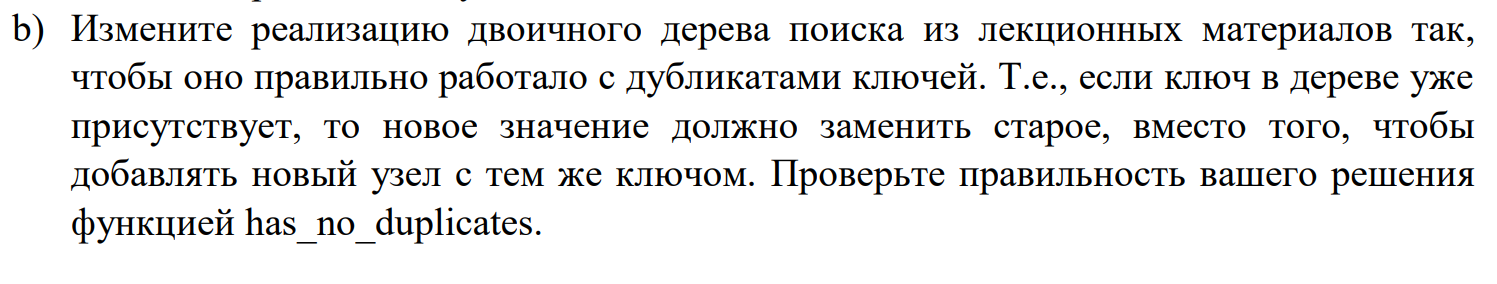

In [14]:
class TreeNode:
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = TreeNode(key, val)
        self.size += 1

    def _put(self, key, val, currentNode):
        if key < currentNode.key:
            if currentNode.hasLeftChild():
                self._put(key, val, currentNode.leftChild)
            else:
                currentNode.leftChild = TreeNode(key, val, parent=currentNode)
        
        elif key > currentNode.key:
            if currentNode.hasRightChild():
                self._put(key, val, currentNode.rightChild)
            else:
                currentNode.rightChild = TreeNode(key, val, parent=currentNode)
        
        else:
            # Ключ равен текущему (дубликат).
            # Заменяем значение (payload), не создаем новый узел.
            currentNode.payload = val
            # Так как мы не добавили узел, размер дерева не должен расти.
            # Но так как он уже инкрементирован в put(), нам нужно его уменьшить обратно,
            # либо не инкрементировать там.
            self.size -= 1 

    def get(self, key):
        if self.root:
            res = self._get(key, self.root)
            if res:
                return res.payload
            else:
                return None
        else:
            return None

    def _get(self, key, currentNode):
        if not currentNode:
            return None
        elif currentNode.key == key:
            return currentNode
        elif key < currentNode.key:
            return self._get(key, currentNode.leftChild)
        else:
            return self._get(key, currentNode.rightChild)

    def __setitem__(self, k, v):
        self.put(k, v)

    def __getitem__(self, k):
        return self.get(k)

def has_no_duplicates(tree):
    """Функция проверки"""
    seen_keys = set()
    def _check_node(node):
        if not node: return True
        if node.key in seen_keys: return False
        seen_keys.add(node.key)
        return _check_node(node.leftChild) and _check_node(node.rightChild)
    return _check_node(tree.root)


# 1. Создаем дерево
bst = BinarySearchTree()

# 2. Добавляем данные
bst[1] = "Apple"
bst[2] = "Banana"
bst[3] = "Cherry"

print(f"Размер дерева: {len(bst)}") # 3
print(f"Дубликатов нет? {has_no_duplicates(bst)}") # True

# 3. Добавляем дубликат ключа '2' с новым значением
print("\nДобавляем ключ 2 со значением 'Blueberry'...")
bst[2] = "Blueberry" 

# 4. Проверяем результаты
print(f"Новое значение для ключа 2: {bst[2]}") # 'Blueberry'
print(f"Размер дерева: {len(bst)}") # 3 (узел обновлен)

# 5. Проверяем функцией has_no_duplicates
is_clean = has_no_duplicates(bst)
print(f"Дубликатов нет? {is_clean}") # True

# Создадим ситуацию с дубликатами искусственно
print("\nИскусственное создание дубликата")
# Вручную добавим дубликат в левое поддерево
bst.root.leftChild = TreeNode(2, "Fake Duplicate", parent=bst.root) 
print(f"Дубликатов нет? {has_no_duplicates(bst)}") # False


Размер дерева: 3
Дубликатов нет? True

Добавляем ключ 2 со значением 'Blueberry'...
Новое значение для ключа 2: Blueberry
Размер дерева: 3
Дубликатов нет? True

Искусственное создание дубликата
Дубликатов нет? False


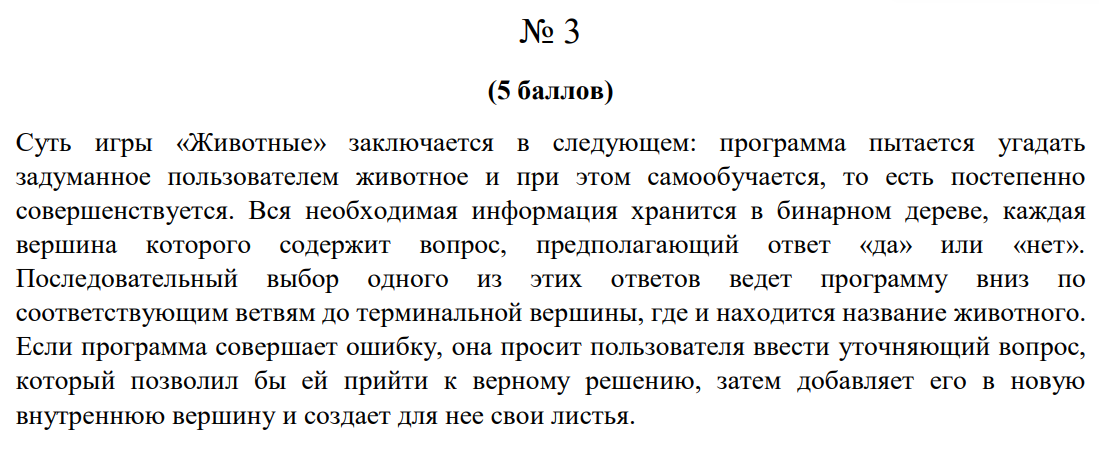
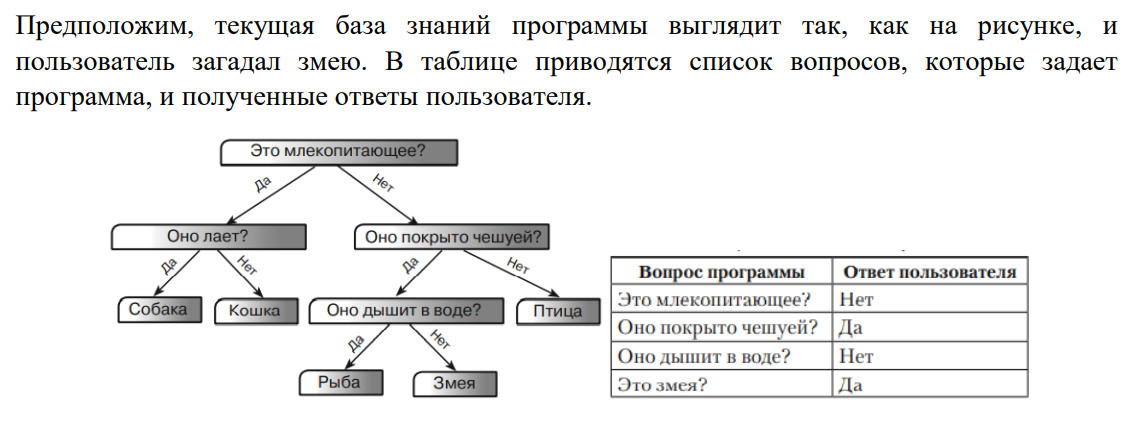
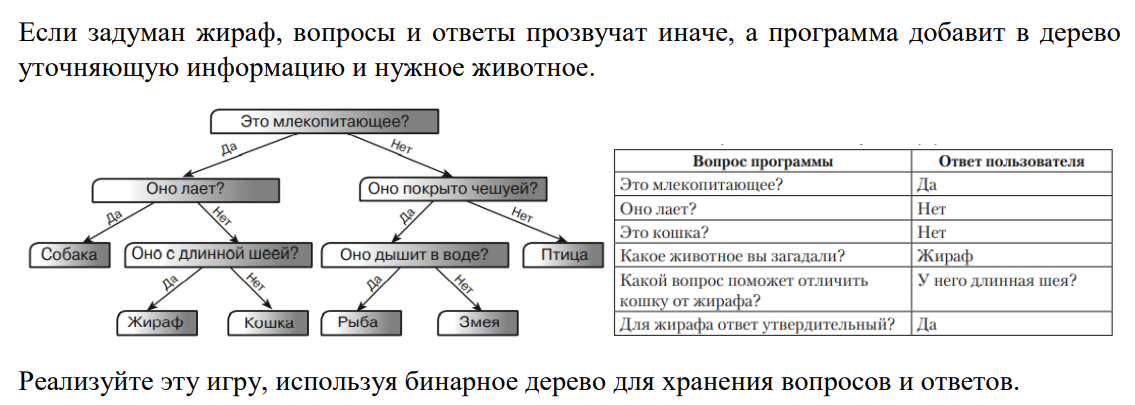

In [ ]:
import json
import os

class Node:
    def __init__(self, text, is_question=True):
        self.text = text
        self.is_question = is_question
        self.yes_branch = None
        self.no_branch = None 

class AnimalGame:
    def __init__(self):
        # Начальная база знаний
        self.root = Node("Это млекопитающее?")
        
        self.root.yes_branch = Node("Оно лает?")
        self.root.yes_branch.yes_branch = Node("Собака", is_question=False)
        self.root.yes_branch.no_branch = Node("Кошка", is_question=False)
        
        self.root.no_branch = Node("Оно покрыто чешуей?")
        self.root.no_branch.yes_branch = Node("Оно дышит в воде?")
        
        water_node = self.root.no_branch.yes_branch
        water_node.yes_branch = Node("Рыба", is_question=False)
        water_node.no_branch = Node("Змея", is_question=False)
        
        self.root.no_branch.no_branch = Node("Птица", is_question=False)

    def play(self):
        print("\nЗагадайте животное, а я попробую его угадать!")
        current_node = self.root
        parent = None
        is_yes_branch = False

        # 1. Спуск по дереву вопросов
        while current_node.is_question:
            answer = input(f"{current_node.text} (да/нет): ").lower().strip()
            parent = current_node
            if answer == 'да':
                current_node = current_node.yes_branch
                is_yes_branch = True
            else:
                current_node = current_node.no_branch
                is_yes_branch = False

        # 2. Попытка угадать
        guess_answer = input(f"Это {current_node.text}? (да/нет): ").lower().strip()

        if guess_answer == 'да':
            print("Ура! Я угадал!")
        else:
            # 3. Обучение новому животному
            print("Я сдаюсь. Какое животное вы загадали?")
            new_animal_name = input("Введите название животного: ").strip()
            old_animal_name = current_node.text
            
            print(f"Какой вопрос поможет отличить '{new_animal_name}' от '{old_animal_name}'?")
            new_question_text = input("Введите вопрос: ").strip()
            
            print(f"Для '{new_animal_name}' ответ на этот вопрос будет 'да' или 'нет'?")
            new_ans = input("Ответ (да/нет): ").lower().strip()

            # Создаем структуру для новых узлов
            new_question_node = Node(new_question_text, is_question=True)
            new_animal_node = Node(new_animal_name, is_question=False)
            old_animal_node = Node(old_animal_name, is_question=False)

            if new_ans == 'да':
                new_question_node.yes_branch = new_animal_node
                new_question_node.no_branch = old_animal_node
            else:
                new_question_node.yes_branch = old_animal_node
                new_question_node.no_branch = new_animal_node

            # Заменяем старый лист на новый узел-вопрос
            if parent is None:
                # Если дерево состояло только из одного животного
                self.root = new_question_node
            elif is_yes_branch:
                parent.yes_branch = new_question_node
            else:
                parent.no_branch = new_question_node
            
            print("Спасибо! Я стал умнее.")

# --- Запуск игры ---
if __name__ == "__main__":
    game = AnimalGame()
    
    while True:
        game.play()
        if input("\nСыграем еще раз? (да/нет): ").lower().strip() != 'да':
            break



Загадайте животное, а я попробую его угадать!
Я сдаюсь. Какое животное вы загадали?
Какой вопрос поможет отличить 'Жираф' от 'Кошка'?
Для 'Жираф' ответ на этот вопрос будет 'да' или 'нет'?
Спасибо! Я стал умнее.

Загадайте животное, а я попробую его угадать!
Ура! Я угадал!


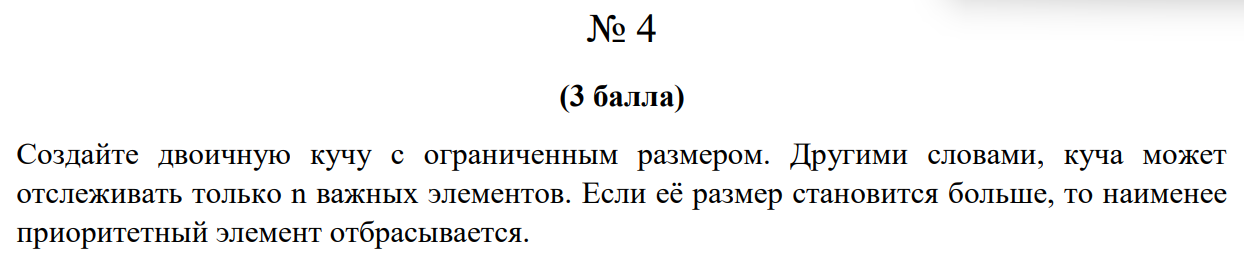

In [ ]:
class LimitedBinaryHeap:
    def __init__(self, limit):
        self.heapList = [0]
        self.currentSize = 0
        self.limit = limit

    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                self.heapList[i], self.heapList[i // 2] = self.heapList[i // 2], self.heapList[i]
            i = i // 2

    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                self.heapList[i], self.heapList[mc] = self.heapList[mc], self.heapList[i]
            i = mc

    def minChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1

    def insert(self, k):
        """
        Вставляет элемент k. Если куча переполнена,
        сохраняет k только если он больше, чем текущий минимум кучи.
        """
        if self.currentSize < self.limit:
            # Если место есть, добавляем как обычно
            self.heapList.append(k)
            self.currentSize += 1
            self.percUp(self.currentSize)
        else:
            # Куча полна. Мы храним топ наибольших элементов,
            # Если новый элемент k больше корня, он более важен
            # Мы заменяем корень на k и восстанавливаем порядок
            if k > self.heapList[1]:
                self.heapList[1] = k
                self.percDown(1)
            else:
                # Если k меньше корня, значит он меньше всех 'важных' элементов
                # Он 'наименее приоритетный' и просто отбрасывается
                pass

    def get_important_elements(self):
        # Возвращает список важных элементов
        return self.heapList[1:]


# Создадим кучу
my_heap = LimitedBinaryHeap(limit=3)

data = [10, 5, 20, 3, 100, 1]

print(f"Поток данных: {data}")
for num in data:
    my_heap.insert(num)
    print(f"Добавлено {num:3}. Текущие важные: {my_heap.get_important_elements()}")

# Должны остаться 10, 20, 100 
print("\nИтоговые элементы:", sorted(my_heap.get_important_elements()))


Поток данных: [10, 5, 20, 3, 100, 1]
Добавлено  10. Текущие важные: [10]
Добавлено   5. Текущие важные: [5, 10]
Добавлено  20. Текущие важные: [5, 10, 20]
Добавлено   3. Текущие важные: [5, 10, 20]
Добавлено 100. Текущие важные: [10, 100, 20]
Добавлено   1. Текущие важные: [10, 100, 20]

Итоговые элементы: [10, 20, 100]


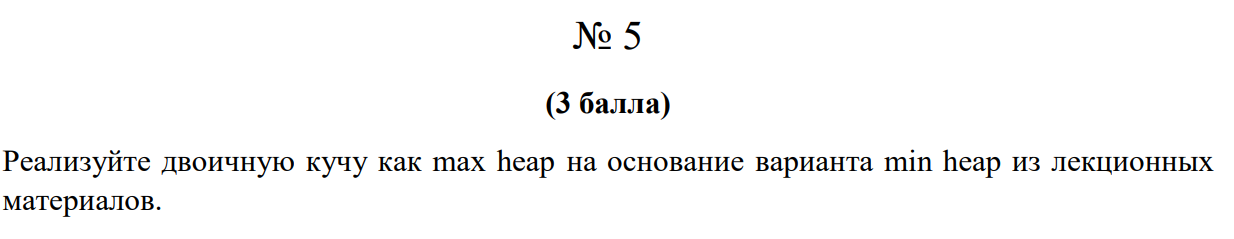

In [20]:
class MaxBinaryHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] > self.heapList[i // 2]:
                self.heapList[i], self.heapList[i // 2] = self.heapList[i // 2], self.heapList[i]
            i = i // 2

    def insert(self, k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.maxChild(i)
            if self.heapList[i] < self.heapList[mc]:
                self.heapList[i], self.heapList[mc] = self.heapList[mc], self.heapList[i]
            i = mc

    def maxChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] > self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1

    def delMax(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self, alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1


my_heap = MaxBinaryHeap()

# Строим кучу
data = [5, 9, 11, 14, 18, 19, 21, 33, 17, 27]
my_heap.buildHeap(data)

print(f"Исходные данные: {data}")
print(f"Внутренний список кучи: {my_heap.heapList}")

print("\nУдаляем элементы по одному:")
results = []
for _ in range(len(data)):
    results.append(my_heap.delMax())

# Ожидается: 3, 27, 21, 19, 18, 17, 14, 11, 9, 5
print(*results)


Исходные данные: [5, 9, 11, 14, 18, 19, 21, 33, 17, 27]
Внутренний список кучи: [0, 33, 27, 21, 17, 18, 19, 11, 14, 9, 5]

Удаляем элементы по одному:
33 27 21 19 18 17 14 11 9 5


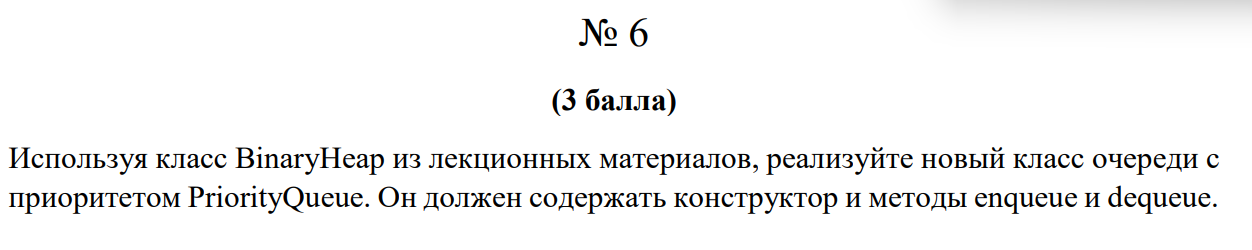

In [ ]:
class BinaryHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                self.heapList[i], self.heapList[i // 2] = self.heapList[i // 2], self.heapList[i]
            i = i // 2

    def insert(self, k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                self.heapList[i], self.heapList[mc] = self.heapList[mc], self.heapList[i]
            i = mc

    def minChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1

    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval

    def isEmpty(self):
        return self.currentSize == 0


class PriorityQueue:
    def __init__(self):
        # Используем композицию
        self.heap = BinaryHeap()

    def enqueue(self, item):
        """Добавляет элемент в очередь с учетом приоритета"""
        self.heap.insert(item)

    def dequeue(self):
        """Извлекает и возвращает элемент с наивысшим приоритетом"""
        if self.heap.isEmpty():
            return None
        return self.heap.delMin()
    
    def size(self):
        return self.heap.currentSize

    def is_empty(self):
        return self.heap.isEmpty()


pq = PriorityQueue()

# Добавляем элементы в случайном порядке
tasks = [
    (3, "Помыть посуду"),
    (1, "Сделать домашку"),
    (5, "Поиграть в игры"),
    (2, "Вынести мусор")
]

print("Добавляем задачи в очередь...")
for t in tasks:
    pq.enqueue(t)
    print(f"Добавлено: {t}")

print("\nИзвлекаем задачи по приоритету (от 1 до 5):")
while not pq.is_empty():
    item = pq.dequeue()
    print(f"Выполнено: {item}")

# Ожидаемый порядок вывода:
# (1, 'Сделать домашку')
# (2, 'Вынести мусор')
# (3, 'Помыть посуду')
# (5, 'Поиграть в игры')


Добавляем задачи в очередь...
Добавлено: (3, 'Помыть посуду')
Добавлено: (1, 'Сделать домашку')
Добавлено: (5, 'Поиграть в игры')
Добавлено: (2, 'Вынести мусор')

Извлекаем задачи по приоритету (от 1 до 5):
Выполнено: (1, 'Сделать домашку')
Выполнено: (2, 'Вынести мусор')
Выполнено: (3, 'Помыть посуду')
Выполнено: (5, 'Поиграть в игры')
